### <a name="sample"></a>Simulating a sample dwelling

The following code will initialize a Dwelling using [sample
files](https://github.com/NREL/OCHRE/tree/main/ochre/defaults/Input%20Files)
from the [ResStock 2024.2 dataset](https://resstock.nrel.gov/datasets) and
from the [EnergyPlus website](https://energyplus.net/weather) (for weather
data). In addition to specifying input files, OCHRE requires a simulation
start time, time resolution, and duration.

In [1]:
import os
import datetime as dt

from ochre import Dwelling
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
default_input_path = os.path.join(PROJECT_ROOT, "ochre", "defaults")

dwelling_args = {
    # Timing parameters
    "start_time": dt.datetime(2018, 1, 1, 0, 0),  # (year, month, day, hour, minute)
    "time_res": dt.timedelta(minutes=10),         # time resolution of the 
    # simulation
    "duration": dt.timedelta(days=3),             # duration of the simulation

    # Input files
    "hpxml_file": os.path.join(default_input_path, "Input Files", "bldg0112631-up11.xml"),
    "hpxml_schedule_file": os.path.join(default_input_path, "Input Files", "bldg0112631_schedule.csv"),
    "weather_file": os.path.join(default_input_path, "Weather", "USA_CO_Denver.Intl.AP.725650_TMY3.epw"),
}

# Create Dwelling model
dwelling = Dwelling(**dwelling_args)

2025-10-14 12:18:07.574481 - ochre at 2018-01-01 00:00:00: Initializing ochre (OCHRE v0.9.1)
2025-10-14 12:18:07.574739 - ochre at 2018-01-01 00:00:00: Removing previous results file: /Users/levipremer/PycharmProjects/OCHRE_test/ochre/defaults/Input Files/ochre.csv
2025-10-14 12:18:07.579988 - ochre at 2018-01-01 00:00:00: Removing previous results file: /Users/levipremer/PycharmProjects/OCHRE_test/ochre/defaults/Input Files/ochre_metrics.csv
2025-10-14 12:18:07.580085 - ochre at 2018-01-01 00:00:00: Removing previous results file: /Users/levipremer/PycharmProjects/OCHRE_test/ochre/defaults/Input Files/ochre_hourly.csv
2025-10-14 12:18:09.110830 - ochre at 2018-01-01 00:00:00: Dwelling Initialized


The following code will simulate the dwelling. By default, it will return the
following results and save them to files:

- `df`: a Pandas DataFrame of time series results
- `metrics`: a dictionary of energy metrics
- `hourly`: a Pandas DataFrame of time series results with 1 hour resolution

In [5]:
df, metrics, hourly = dwelling.simulate()


2025-10-14 12:18:26.145687 - ochre at 2018-01-01 00:00:00: Running Simulation for 3 days, 0:00:00
2025-10-14 12:18:26.387605 - ochre at 2018-01-04 00:00:00: Simulation complete, time series results saved to: /Users/levipremer/PycharmProjects/OCHRE_test/ochre/defaults/Input Files/ochre.csv
2025-10-14 12:18:26.389152 - ochre at 2018-01-04 00:00:00: Post-processing metrics saved to: /Users/levipremer/PycharmProjects/OCHRE_test/ochre/defaults/Input Files/ochre_metrics.csv
2025-10-14 12:18:26.391537 - ochre at 2018-01-04 00:00:00: Hourly results saved to: /Users/levipremer/PycharmProjects/OCHRE_test/ochre/defaults/Input Files/ochre_hourly.csv


The time series results include the total house power&mdash;including electricity
real and reactive power and natural gas consumption&mdash;building zone
temperatures, and unmet HVAC load. Many [additional
results](https://ochre-nrel.readthedocs.io/en/latest/Outputs.html) can be
saved by increasing the `verbosity` of the simulation (default is 3).

In [6]:
df.head()

,Total Electric Power (kW),Total Reactive Power (kVAR),Total Gas Power (therms/hour),Water Heating Electric Power (kW),Other Electric Power (kW),Lighting Electric Power (kW),HVAC Heating Electric Power (kW),HVAC Cooling Electric Power (kW),Hot Water Unmet Demand (kW),Hot Water Outlet Temperature (C),Temperature - Indoor (C),Unmet HVAC Load (C)
Time,,,,,,,,,,,,
2018-01-01 00:00:00,11.414557,7.368462,0.0,0.001,0.230687,0.016273,11.116597,0.05,0.0,51.111111,20.293399,0
2018-01-01 00:10:00,9.223750,5.953340,0.0,0.001,0.230687,0.016273,8.925790,0.05,0.0,51.065152,20.649424,0
2018-01-01 00:20:00,9.155548,5.909286,0.0,0.001,0.230687,0.016273,8.857588,0.05,0.0,51.019758,20.649424,0
2018-01-01 00:30:00,9.116016,5.883751,0.0,0.001,0.230687,0.016273,8.818057,0.05,0.0,50.973620,20.649424,0
2018-01-01 00:40:00,9.092120,5.868315,0.0,0.001,0.230687,0.016273,8.794160,0.05,0.0,50.927873,20.649424,0


Metrics include the total house electricity and natural gas energy consumed,
peak electric power, average zone temperatures, and total unmet HVAC load. Many [additional
metrics](https://ochre-nrel.readthedocs.io/en/latest/Outputs.html#all-metrics) can be
saved by increasing the `metrics_verbosity` of the simulation (default is 3).

In [8]:
metrics

{'Total Electric Energy (kWh)': 220.63306899830656,
 'Total Gas Energy (therms)': 0.0,
 'Average Electric Power (kW)': 3.064348180532036,
 'Peak Electric Power (kW)': 11.414556892821054,
 'HVAC Heating Electric Energy (kWh)': 171.16084511101363,
 'Water Heating Electric Energy (kWh)': 5.199996885080747,
 'HVAC Cooling Electric Energy (kWh)': 3.6,
 'Other Electric Energy (kWh)': 35.03264935420963,
 'Lighting Electric Energy (kWh)': 5.639577648002511,
 'Average Temperature - Indoor (C)': 20.66965659038975,
 'Unmet Heating Load (C-hours)': 0.0,
 'Unmet Cooling Load (C-hours)': 0.0,
 'Total Hot Water Unmet Demand (kWh)': 0.0}

The `Analysis` module has useful data analysis functions for OCHRE output
data. The following code will recalculate the metrics
from the previous run:


In [9]:
from ochre import Analysis

# calculate metrics from the time series results
metrics2 = Analysis.calculate_metrics(df)

The `CreateFigures` module has useful visualization functions for OCHRE output
data. The following code will create a stacked plot of house power by end use:

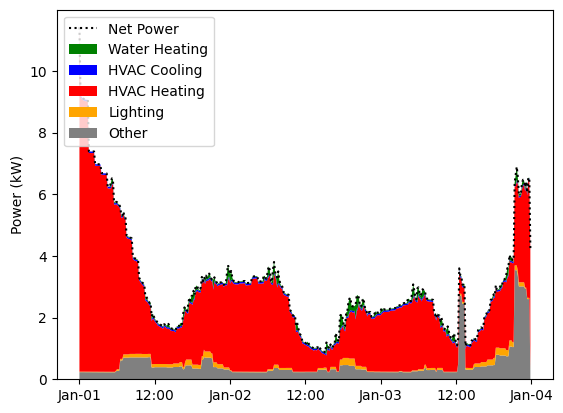

In [8]:
%matplotlib inline

from ochre import CreateFigures

# Plot results
fig = CreateFigures.plot_power_stack(df)

The following code will plot the average daily load profile:


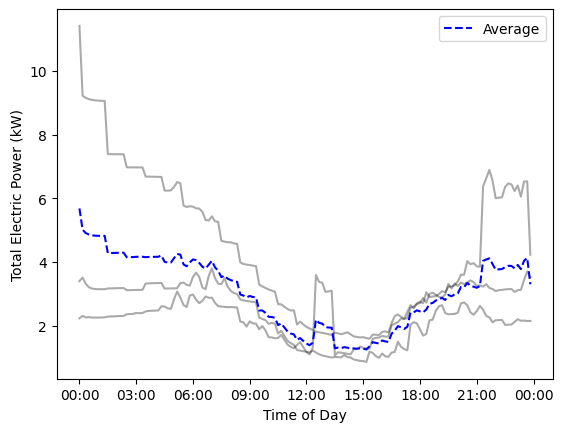

In [11]:
fig = CreateFigures.plot_daily_profile(df, 'Total Electric Power (kW)', plot_max=False, plot_min=False)


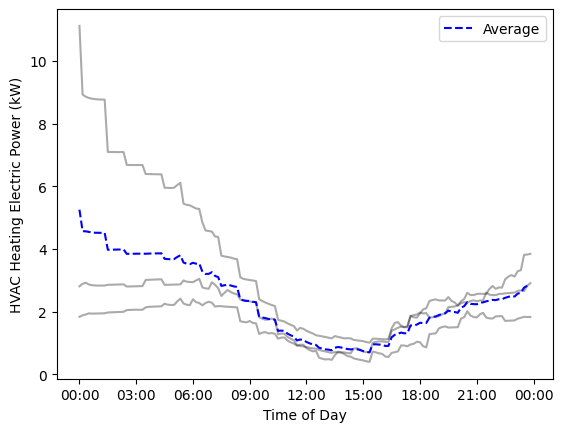

In [9]:
fig = CreateFigures.plot_daily_profile(df, 'HVAC Heating Electric Power (kW)', 
                                       plot_max=False, plot_min=False)


### <a name="download"></a>Downloading input files

The above examples use sample files that are included in the OCHRE package. A
simple way to use other input files is to
[download](https://ochre-nrel.readthedocs.io/en/latest/InputsAndArguments.html#getting-input-files)
them from ResStock Datasets. ResStock metadata can be used to choose which
model to download.

The following code will download ResStock files (the same ones as the sample
files) to your current working directory. On Google Colab, these files can be
viewed by clicking on the folder icon on the left-hand side.

The simplest way to get weather files is through the [EnergyPlus
website](https://energyplus.net/weather). You can also upload your own files
to Colab. The following code will download an EnergyPlus weather file.

In [15]:
weather_file = "USA_CO_Denver.Intl.AP.725650_TMY3.epw"

# Note: this may not work on all systems
!wget https://energyplus-weather.s3.amazonaws.com/north_and_central_america_wmo_region_4/USA/CO/USA_CO_Denver.Intl.AP.725650_TMY3/USA_CO_Denver.Intl.AP.725650_TMY3.epw

# alternate to copy weather file from OCHRE sample files
# import shutil
# shutil.copy(os.path.join(default_input_path, "Weather", weather_file), this_path)

zsh:1: command not found: wget


## <a name="control"></a>Simulating with external controllers

OCHRE is designed to integrate with external controllers and other modeling
tools. External controllers can adjust the power consumption of any OCHRE
equipment using multiple [control
methods](https://ochre-nrel.readthedocs.io/en/latest/ControllerIntegration.html).
The following examples show device-level control methods for HVAC systems,
EVs, and water heaters.

For more details and examples, see
[run_external_control.py](https://github.com/NREL/OCHRE/blob/main/bin/run_external_control.py).
There is also example code to run OCHRE in
[co-simulation](https://github.com/NREL/OCHRE/blob/main/bin/run_cosimulation.py)
using HELICS.

### <a name="hvac-control"></a>HVAC setpoint control

This control will reduce the heating setpoint by 1C from 5-9PM each day. It
adjusts the setpoint schedule before beginning the simulation; however, this
control can be achieved by [setting the
setpoint](https://ochre-nrel.readthedocs.io/en/latest/ControllerIntegration.html#hvac-heating-or-hvac-cooling)
at every time step as well. We use the same house model as the first example.

In [31]:
# Update the simulation args to run at a finer time resolution
dwelling_args.update(
    {
        "time_res": dt.timedelta(minutes=1),  # time resolution of the simulation
        "duration": dt.timedelta(days=1),  # duration of the simulation
        "verbosity": 6,  # increases the number of results for plotting (default=3)
    }
)

# Initialize the Dwelling
dwelling = Dwelling(**dwelling_args)

# Get HVAC heater schedule
heater = dwelling.get_equipment_by_end_use("HVAC Heating")
schedule = heater.schedule

# Reduce heating setpoint by 1C from 5-9PM (setpoint is already in the schedule)
peak_times = (schedule.index.hour >= 17) & (schedule.index.hour < 21)
schedule.loc[peak_times, "HVAC Heating Setpoint (C)"] -= 1

# Adjust the HVAC deadband temperature (not in the schedule yet)
schedule["HVAC Heating Deadband (C)"] = 1
schedule.loc[peak_times, "HVAC Heating Deadband (C)"] = 2

# Reset the schedule to implement the changes
heater.reset_time()

# Simulate
df, _, _ = dwelling.simulate()


2025-10-14 12:40:33.834804 - ochre at 2018-01-01 00:00:00: Initializing ochre (OCHRE v0.9.1)
2025-10-14 12:40:33.835239 - ochre at 2018-01-01 00:00:00: Removing previous results file: /Users/levipremer/PycharmProjects/OCHRE_test/ochre/defaults/Input Files/ochre.csv
2025-10-14 12:40:33.837163 - ochre at 2018-01-01 00:00:00: Removing previous results file: /Users/levipremer/PycharmProjects/OCHRE_test/ochre/defaults/Input Files/ochre_metrics.csv
2025-10-14 12:40:33.837297 - ochre at 2018-01-01 00:00:00: Removing previous results file: /Users/levipremer/PycharmProjects/OCHRE_test/ochre/defaults/Input Files/ochre_hourly.csv
2025-10-14 12:40:34.037588 - ochre at 2018-01-01 00:00:00: Dwelling Initialized
2025-10-14 12:40:34.042492 - ochre at 2018-01-01 00:00:00: Running Simulation for 1 day, 0:00:00
2025-10-14 12:40:34.648064 - ochre at 2018-01-02 00:00:00: Simulation complete, time series results saved to: /Users/levipremer/PycharmProjects/OCHRE_test/ochre/defaults/Input Files/ochre.csv
2025

<Axes: xlabel='Time'>

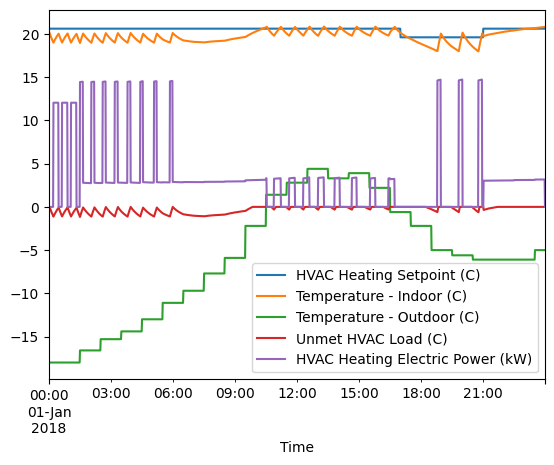

In [32]:
cols_to_plot = [
    "HVAC Heating Setpoint (C)",
    "Temperature - Indoor (C)",
    "Temperature - Outdoor (C)",
    "Unmet HVAC Load (C)",
    "HVAC Heating Electric Power (kW)",
]
df.loc[:, cols_to_plot].plot()


<Axes: xlabel='Time'>

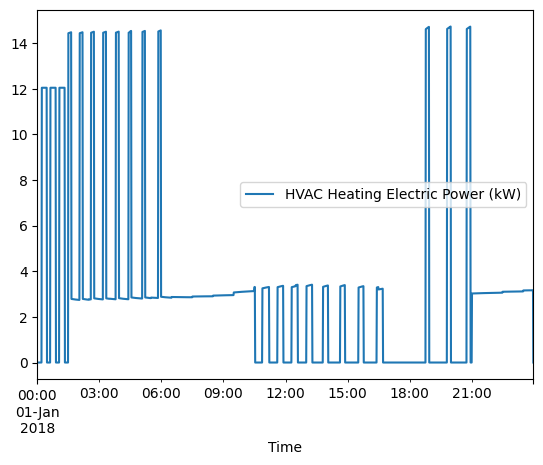

In [33]:
cols_to_plot = ['HVAC Heating Electric Power (kW)']
df.loc[:, cols_to_plot].plot()

In [35]:
df.head()

,Total Electric Power (kW),Total Reactive Power (kVAR),Total Gas Power (therms/hour),Total Electric Energy (kWh),Total Reactive Energy (kVARh),Total Gas Energy (therms),Water Heating Electric Power (kW),Other Electric Power (kW),Lighting Electric Power (kW),HVAC Heating Electric Power (kW),...,Temperature - Ground (C),Net Sensible Heat Gain - Indoor (W),Net Sensible Heat Gain - Foundation (W),Net Sensible Heat Gain - Garage (W),Net Sensible Heat Gain - Attic (W),Infiltration Heat Gain - Indoor (W),Forced Ventilation Heat Gain - Indoor (W),Natural Ventilation Heat Gain - Indoor (W),Internal Heat Gain - Indoor (W),Window Transmitted Solar Gain (W)
Time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,0.29796,0.187849,0.0,0.004966,0.003131,0.0,0.001,0.230687,0.016273,0.0,...,6.529479,-3234.197179,-3157.025931,-7240.811301,-310.210724,-3578.392666,-0.0,-0.0,365.640333,0.0
2018-01-01 00:01:00,0.29796,0.187849,0.0,0.004966,0.003131,0.0,0.001,0.230687,0.016273,0.0,...,6.529479,-3210.218689,-3079.732433,-7055.657737,-292.755506,-3560.331869,-0.0,-0.0,365.640333,0.0
2018-01-01 00:02:00,0.29796,0.187849,0.0,0.004966,0.003131,0.0,0.001,0.230687,0.016273,0.0,...,6.529479,-3187.425448,-3012.066928,-6887.029134,-290.824793,-3542.804981,-0.0,-0.0,365.640333,0.0
2018-01-01 00:03:00,0.29796,0.187849,0.0,0.004966,0.003131,0.0,0.001,0.230687,0.016273,0.0,...,6.529479,-3165.139969,-2948.488956,-6724.990990,-287.534525,-3525.788390,-0.0,-0.0,365.640333,0.0
2018-01-01 00:04:00,0.29796,0.187849,0.0,0.004966,0.003131,0.0,0.001,0.230687,0.016273,0.0,...,6.529479,-3143.599224,-2888.973822,-6569.929335,-284.277552,-3509.259999,-0.0,-0.0,365.640333,0.0


In [25]:
heater

In [26]:
# list attributes
for k, v in vars(heater).items():
    print(f"{k}: {v}")

n_speeds: 1
control_type: Time
disable_speeds: [False]
time_in_speed: 0:00:00
min_time_in_speed: [datetime.timedelta(seconds=300), datetime.timedelta(seconds=300)]
biquad_params: {1: {'eir_t': array([ 7.16518071e-01,  1.02759010e-02,  4.60734000e-04, -6.48036500e-03,
        4.56354000e-04, -6.97640000e-04]), 'eir_ff': array([ 2.18541875, -1.94282792,  0.75740917]), 'eir_plr': array([0.8, 0.2, 0. ]), 'cap_t': array([ 8.78143655e-01, -2.91485500e-03, -3.33700000e-05,  2.23866610e-02,
        1.63944000e-04, -2.18700000e-05]), 'cap_ff': array([ 0.69404546,  0.47420798, -0.16825345]), 'cap_plr': array([1., 0., 0.]), 'min_Twb': -100.0, 'max_Twb': 100.0, 'min_Tdb': -100.0, 'max_Tdb': 100.0, 'min_ff': 0, 'max_ff': 1, 'min_plf': 0.7, 'max_plf': 1, 'eir_plf': array([0.89, 0.11, 0.  ])}}
is_heater: True
hvac_mult: 1
envelope_model: <ochre.Models.Envelope.Envelope object at 0x168847a40>
zone: <ochre.Models.Envelope.Zone object at 0x31f4631d0>
name: ASHP Heater
main_sim_name: ochre
main_simulator

## Try to understand verbosity differences

In [36]:


# --- Common inputs ---
HPXML = "bldg0112631-up00.xml"  # your uploaded file
SCHEDULES = "bldg0112631_schedule.csv"  # adjust if different
EPW = "USA_CO_Denver.Intl.AP.725650_TMY3.epw"  # or another EPW path

# short simulation window to keep it fast
t0 = dt.datetime(2018, 1, 1)
dt_step = dt.timedelta(minutes=10)
duration = dt.timedelta(days=2)

# --- Run at verbosity = 1 ---
home_v1 = Dwelling(
    start_time=t0,
    time_res=dt_step,
    duration=duration,
    hpxml_file=HPXML,
    hpxml_schedule_file=SCHEDULES,
    weather_file=EPW,
    verbosity=3,
)
df1, metrics1, hourly1 = home_v1.simulate()

# --- Run at verbosity = 3 ---
home_v3 = Dwelling(
    start_time=t0,
    time_res=dt_step,
    duration=duration,
    hpxml_file=HPXML,
    hpxml_schedule_file=SCHEDULES,
    weather_file=EPW,
    verbosity=12,
)
df3, metrics3, hourly3 = home_v3.simulate()

# --- Compare outputs ---
print(f"verbosity=1 → {len(df1.columns)} columns")
print(f"verbosity=3 → {len(df3.columns)} columns\n")

# Which new variables appear at verbosity=3?
extra_cols = [c for c in df3.columns if c not in df1.columns]
print("New columns only present at verbosity=3 (first 40 shown):")
print(extra_cols[:40])


2025-10-14 12:49:11.802158 - ochre at 2018-01-01 00:00:00: Initializing ochre (OCHRE v0.9.1)
2025-10-14 12:49:11.802826 - ochre at 2018-01-01 00:00:00: Removing previous results file: /Users/levipremer/PycharmProjects/OCHRE_test/bin/ochre.csv
2025-10-14 12:49:11.816401 - ochre at 2018-01-01 00:00:00: Removing previous results file: /Users/levipremer/PycharmProjects/OCHRE_test/bin/ochre_metrics.csv
2025-10-14 12:49:11.816627 - ochre at 2018-01-01 00:00:00: Removing previous results file: /Users/levipremer/PycharmProjects/OCHRE_test/bin/ochre_hourly.csv
2025-10-14 12:49:11.816902 - ochre at 2018-01-01 00:00:00: Removing previous results file: /Users/levipremer/PycharmProjects/OCHRE_test/bin/ochre_schedule.csv
2025-10-14 12:49:12.061401 - ochre at 2018-01-01 00:00:00: Dwelling Initialized
2025-10-14 12:49:12.064533 - ochre at 2018-01-01 00:00:00: Running Simulation for 2 days, 0:00:00
2025-10-14 12:49:12.286787 - ochre at 2018-01-03 00:00:00: Simulation complete, time series results saved

In [37]:
df3.head()

,Total Electric Power (kW),Total Reactive Power (kVAR),Total Gas Power (therms/hour),Total Electric Energy (kWh),Total Reactive Energy (kVARh),Total Gas Energy (therms),Other Electric Power (kW),Lighting Electric Power (kW),HVAC Heating Electric Power (kW),HVAC Cooling Electric Power (kW),...,Garage Furniture Garage Film Coefficient (m^2-K/W),Attic Wall Attic LWR Gain (W),Attic Wall Attic Surface Temperature (C),Attic Wall Attic Film Coefficient (m^2-K/W),Attic Roof Attic LWR Gain (W),Attic Roof Attic Surface Temperature (C),Attic Roof Attic Film Coefficient (m^2-K/W),Attic Floor Attic LWR Gain (W),Attic Floor Attic Surface Temperature (C),Attic Floor Attic Film Coefficient (m^2-K/W)
Time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,0.772754,0.187599,0.500503,0.128792,0.031266,0.083417,0.230687,0.016273,0.475795,0.05,...,0.325486,30.413057,-15.427381,0.325486,275.007848,-15.586184,0.536264,-305.420905,-14.097786,0.561134
2018-01-01 00:10:00,0.688266,0.187599,0.392551,0.114711,0.031266,0.065425,0.230687,0.016273,0.391307,0.05,...,0.325486,28.014519,-15.514819,0.325486,265.690185,-15.691515,0.536264,-293.704704,-14.255037,0.561134
2018-01-01 00:20:00,0.685546,0.187599,0.458466,0.114258,0.031266,0.076411,0.230687,0.016273,0.388587,0.05,...,0.325486,24.343282,-15.640633,0.325486,266.158131,-15.880904,0.536264,-290.501413,-14.448737,0.561134
2018-01-01 00:30:00,0.683879,0.187599,0.388303,0.113980,0.031266,0.064717,0.230687,0.016273,0.386919,0.05,...,0.325486,20.715299,-15.780145,0.325486,271.146388,-16.094655,0.536264,-291.861687,-14.643236,0.561134
2018-01-01 00:40:00,0.682842,0.187599,0.387140,0.113807,0.031266,0.064523,0.230687,0.016273,0.385882,0.05,...,0.325486,17.603892,-15.920758,0.325486,276.369317,-16.301605,0.536264,-293.973210,-14.828373,0.561134
